In [30]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt

In [31]:
curr_blob_id = 0
curr_game_id = 0
num_strategies = 2

A blob's strategy is an array representing probability distributions over team (0) and solo (1). `strategy[i]` denotes the probability of playing the ith strategy.

In [32]:
class Blob:
    def __init__(self, strategy, type, speed = 1, size = 1, health = 1):

        global curr_blob_id

        self.id = curr_blob_id
        curr_blob_id += 1
        self.strategy = strategy
        self.speed = speed
        self.size = size
        self.health = health
        self.util = None
        self.type = type    # including this temporarily specifically for the primer sim. 0/1

`blobs` is a list of `blob` objects.

In [63]:
class Game:
    def __init__(self, sr, tt, ts, st, ss, blobs, num_trees, num_team, num_solo, num_episodes):

        global curr_game_id

        self.id = curr_game_id
        curr_game_id += 1
        self.solo_reward = sr
        self.reward_matrix = np.array([[tt, ts], [st, ss]])
        self.blobs = blobs
        self.num_trees = num_trees
        self.num_team = num_team    # again specifically for the primer sim
        self.num_solo = num_solo
        self.num_team_init = num_team
        self.num_solo_init = num_solo
        self.team_util = 0
        self.solo_util = 0
        self.num_episodes = num_episodes
        self.team_avg = []
        self.solo_avg = []
        self.team_percentage = []
        self.solo_percentage = []
        

In [34]:
def episode(game, blob1, blob2):

    global num_strategies

    action1 = np.random.choice(range(num_strategies), p = blob1.strategy)
    action2 = np.random.choice(range(num_strategies), p = blob2.strategy)

    util1 = game.reward_matrix[action1][action2]
    util2 = game.reward_matrix[action2][action1]

    blob1.util = util1
    blob2.util = util2

    return [blob1, blob2, util1, util2]

In [57]:
def reproduce(blobs):
    new_blobs = []
    new_team = 0
    new_solo = 0
    for blob in blobs:
        # print(blob.util)
        for i in range(math.floor(blob.util)):
            new_blobs.append(Blob(blob.strategy, blob.type))

        if blob.type == 0:
            new_team += math.floor(blob.util)
        else:
            new_solo += math.floor(blob.util)

        random_num = random.uniform(0, 1)
        
        if random_num <= (blob.util - math.floor(blob.util)):
            new_blobs.append(Blob(blob.strategy, blob.type))
            
            if blob.type == 0:
                new_team += 1
            else:
                new_solo += 1

    return new_blobs, new_team, new_solo

In [58]:
def simulate(game):
    for i in range(game.num_episodes):
        game.team_percentage.append(game.num_team/(game.num_team+game.num_solo)*100)
        game.solo_percentage.append(game.num_solo/(game.num_team+game.num_solo)*100)

        num_blobs = len(game.blobs)
        permut = game.blobs
        random.shuffle(permut)
        # print(game.blobs)
        # print(permut)

        if num_blobs > 2*game.num_trees:
            permut = permut[:2*game.num_trees]
            num_blobs = 2*game.num_trees

        if num_blobs%2 == 1:
            permut[-1].util = game.solo_reward
            num_blobs -= 1        

        # print(permut)
        for i in range(0, num_blobs, 2):
            # print(permut[i], permut[i+1])
            blob1 = permut[i]
            blob2 = permut[i+1]

            blob1, blob2, util1, util2 = episode(game, blob1, blob2)

            permut[i] = blob1
            permut[i+1] = blob2

            if blob1.type == 0:
                game.team_util += util1
            else:
                game.solo_util += util1

            if blob2.type == 0:
                game.team_util += util2
            else:
                game.solo_util += util2

        
            
        # avg_team_util = game.team_util/game.num_team
        # avg_solo_util = game.solo_util/game.num_solo

        # game.team_avg.append(avg_team_util)
        # game.solo_avg.append(avg_solo_util)

        game.blobs, game.num_team, game.num_solo = reproduce(permut)

In [66]:
def game_stats(game):
    print("Inital percentage of team blobs:", game.num_team_init/(game.num_team_init+game.num_solo_init)*100)
    print("Initial percentage of solo blobs:", game.num_solo_init/(game.num_team_init+game.num_solo_init)*100)
    plt.plot(game.team_percentage)
    plt.plot(game.solo_percentage)
    plt.legend(['team_percentage', 'solo_percentage'])

In [69]:
blobs = []
for i in range(10):
    blobs.append(Blob(np.array([1, 0]), 1))
for i in range(90):
    blobs.append(Blob(np.array([0, 1]), 0))

game = Game(2, 5/4, 6/4, 2/4, 3/4, blobs, 50, 90, 10, 50)
simulate(game)

Inital percentage of team blobs: 90.0
Initial percentage of solo blobs: 10.0


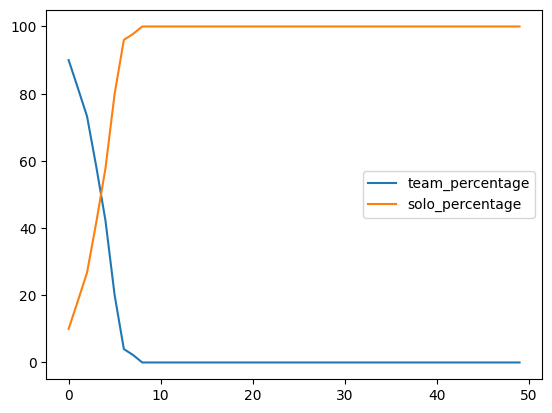

In [70]:
game_stats(game)